In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = tf.keras.datasets.boston_housing

In [3]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [4]:
boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step


In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((404, 13), (404,), (102, 13), (102,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [15]:
model = Sequential([
    Input(shape=(x_train_scaled.shape[1],)),  # Input layer (recommended approach)
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

In [16]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [17]:
# Train the model
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 551.3204 - mae: 21.4870 - val_loss: 594.4573 - val_mae: 22.2502
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 544.2790 - mae: 21.2367 - val_loss: 553.7925 - val_mae: 21.3644
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 496.4683 - mae: 20.2204 - val_loss: 502.3138 - val_mae: 20.1906
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 437.8483 - mae: 18.7781 - val_loss: 435.1042 - val_mae: 18.5770
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 346.5441 - mae: 16.5167 - val_loss: 353.3229 - val_mae: 16.4701
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 303.5709 - mae: 14.9973 - val_loss: 259.5365 - val_mae: 13.8128
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 225.3206 - mae: 12.8434 - val_loss: 173.2663 - val_mae: 10.8687
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 153.2260 - mae: 10.1547 - val_loss: 109.2721 - val_mae: 8.3996
Epoch 9/100
11/1

In [18]:
# Evaluate the model on the test set
loss, mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Test MAE: {mae}")

Test MAE: 2.5774333477020264


In [19]:
# Predict on the test set
y_pred = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [20]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


In [21]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 13.94593362932785
Root Mean Squared Error: 3.734425475133739
Mean Absolute Error: 2.5774334215650367


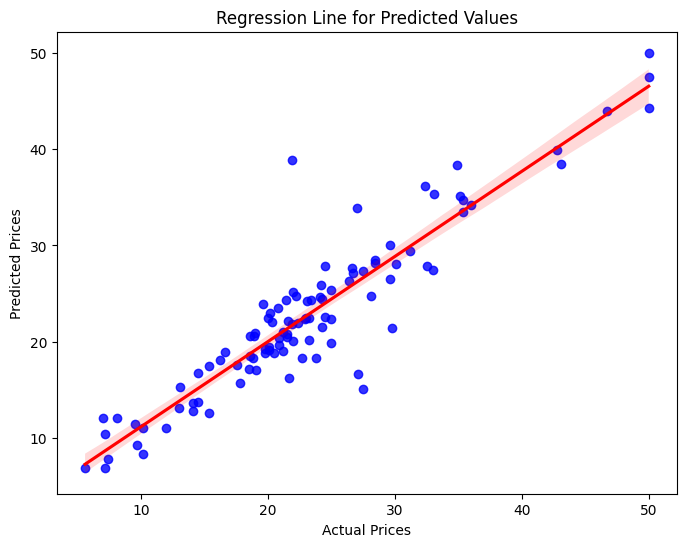

In [10]:
# Inverse transform predictions and actual values
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_actual = y_scaler.inverse_transform(y_test_scaled)

# Plot: Regression line
plt.figure(figsize=(8,6))
sns.regplot(x=y_actual.flatten(), y=y_pred.flatten(), scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Line for Predicted Values")
plt.show()
